# OSEMN Framework

## questions :
day12 :
- how does get_dummies contribute in making model more accurate ?
- how to make binary data to a meaningful feature ?

## Obtain

In [1]:
# get packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# get data 
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/telco_customer_churn_dataset.csv")

df.sample(3) # df.describe() useless bc most data here are not numerical


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1303,0042-RLHYP,Female,0,Yes,Yes,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,1396.9,No
6621,6762-NSODU,Female,0,Yes,Yes,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,958.15,No
4572,6377-WHAOX,Female,0,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.15,6411.25,No


## Scrub

- .map to convert all binary (No & Yes) features to 0 & 1
- pd.get_dummies to any categorical features that with more than 2 options
- utilise `df['feat_name'].unique()` to check whether we can just convert to 0 1 or use pd.get_dummies()

In [2]:
# get each features datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# TotalCharges showing object, but we see all integer when we do .sample(), hence some of the data could be missing/wrong format

# solve by convert TotalCharges to numeric, and set error=coerce, so all missing/wrong format data will return NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# convert all no yes into 0 1

binary_feat = ['Churn', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService']

# convert immediately using .map
for i in binary_feat:
    df[i] = df[i].map({"No" : 0, "Yes" : 1})

df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2130,8945-MUQUF,Male,0,0,0,51,1,Yes,Fiber optic,Yes,...,No,No,Yes,No,One year,1,Electronic check,94.80,4837.60,1
60,0434-CSFON,Female,0,1,0,47,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,100.50,4707.10,0
5072,5995-SNNEW,Male,1,1,0,23,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,104.45,2184.85,0


In [5]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [6]:
# 'no phone service' in MultipleLines is equivalent to 'no'
df['MultipleLines'] = df['MultipleLines'].map({ "No" : 0, "Yes" : 1, "No phone service" : 0})


df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4838,1360-XFJMR,Female,0,1,0,67,1,1,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,1,Credit card (automatic),109.70,7344.45,0
860,4795-UXVCJ,Male,0,0,0,26,1,0,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,0,Credit card (automatic),19.80,457.30,0
917,4079-WWQQQ,Male,0,0,0,72,0,0,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),65.55,4807.45,0


In [7]:
df['OnlineSecurity'].unique()
df['OnlineBackup'].unique()
df['DeviceProtection'].unique()
df['TechSupport'].unique()
df['StreamingTV'].unique()
df['StreamingMovies'].unique()



array(['No', 'Yes', 'No internet service'], dtype=object)

In [8]:
# convert all featurs in a loop that has 'No internet service' as third (and final) choice 

# 'no internet service' in OnlineSecurity is equivalent to 'no'
no_internet_feat = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


for i in no_internet_feat:
    df[i] = df[i].map({ "No" : 0, "Yes" : 1, "No internet service" : 0})

df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6970,8083-YTZES,Male,0,0,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,74.35,265.35,1
4732,1052-QJIBV,Female,0,1,1,71,1,0,No,0,...,0,0,0,0,Two year,0,Credit card (automatic),19.90,1397.30,0
4553,5914-XRFQB,Male,0,1,0,72,1,1,Fiber optic,1,...,1,1,1,1,Two year,1,Bank transfer (automatic),115.80,8424.90,0


In [9]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [10]:
# # # comment out all get_dummies because we dont see how can get_dummies add value towards model making

# # use pd.get_dummies, because we cant assign 1 to DSL & 2 to fiberoptic (and vise versa) because thats us telling the model that fiberoptic is better than dsl

# # get_dummies takes InternetService feature and expand it into n number of features (scroll to the end)
# df = pd.get_dummies(data = df, columns=['InternetService'])
# df.sample(3)

In [11]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [12]:
# df.info() before going from 'scrub' to 'explore' to ensure every feature that we are changing now has no missing value,
# by check the type is either 'int64' or 'float64', NOT object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [13]:
# 'TotalCharges' have 11 NaN data, dropna() since its just abit
df = df.dropna()
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


## Explore

- Heatmap : See which features have highest (+ve & -ve) correlation with targetVariable
- Compare each feature using barplot to see how given feature is significant towards churn 

<AxesSubplot:>

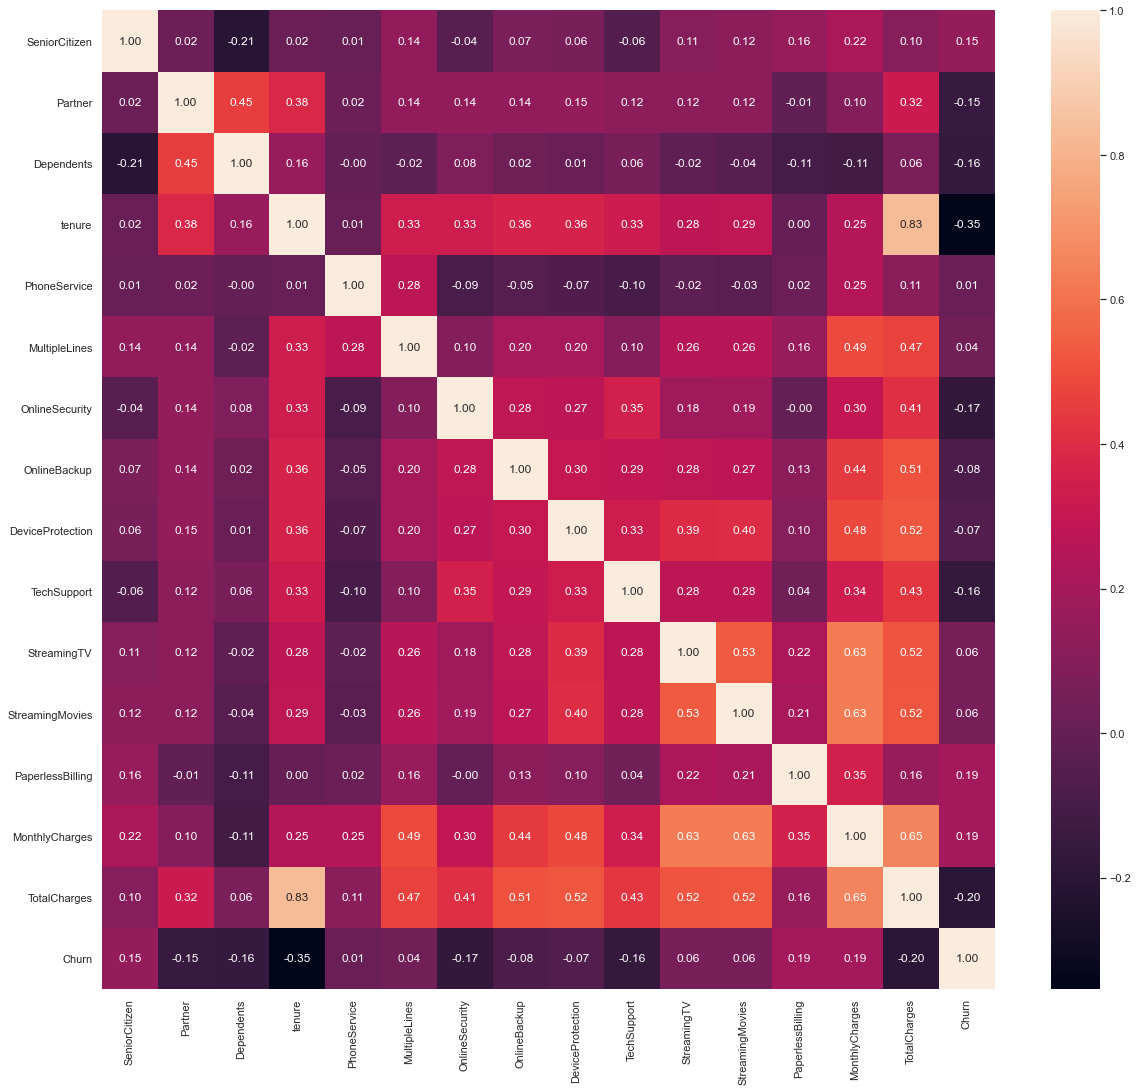

In [14]:
# heatmap

sns.set(rc={'figure.figsize' : (20,18)})
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

# > +-0.3 are : tenure, contract, internetservice_fiber_optic

In [15]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5565,5087-SUURX,Female,0,1,0,18,0,0,DSL,0,...,1,0,1,0,Month-to-month,1,Electronic check,39.05,669.85,1
1072,7771-ZONAT,Male,0,0,0,22,0,0,DSL,0,...,1,1,1,1,Two year,0,Bank transfer (automatic),56.75,1304.85,0
2339,4094-NSEDU,Female,1,0,0,21,1,1,Fiber optic,0,...,0,0,1,1,Month-to-month,1,Electronic check,94.25,1973.75,1


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

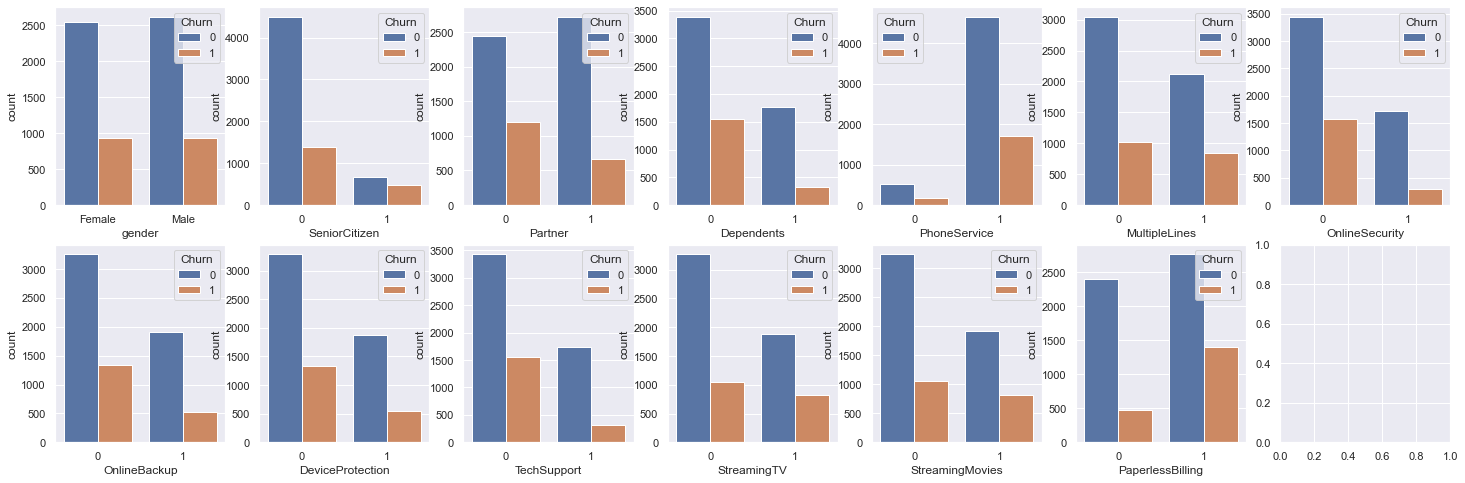

In [16]:
# Compare each feature using barplot to see how given feature is significant towards churn 

# binary data
main, subplots = plt.subplots(2,7, figsize=(25,8))
sns.countplot(data=df,x="gender",hue="Churn", ax=subplots[0,0])
sns.countplot(data=df,x='SeniorCitizen',hue='Churn', ax=subplots[0,1])
sns.countplot(data=df,x='Partner',hue='Churn', ax=subplots[0,2])
sns.countplot(data=df,x='Dependents',hue='Churn', ax=subplots[0,3])
sns.countplot(data=df,x='PhoneService',hue='Churn', ax=subplots[0,4])
sns.countplot(data=df,x='MultipleLines',hue='Churn', ax=subplots[0,5])
sns.countplot(data=df,x='OnlineSecurity',hue='Churn', ax=subplots[0,6])
sns.countplot(data=df,x='OnlineBackup',hue='Churn', ax=subplots[1,0])
sns.countplot(data=df,x='DeviceProtection',hue='Churn', ax=subplots[1,1])
sns.countplot(data=df,x='TechSupport',hue='Churn', ax=subplots[1,2])
sns.countplot(data=df,x='StreamingTV',hue='Churn', ax=subplots[1,3])
sns.countplot(data=df,x='StreamingMovies',hue='Churn', ax=subplots[1,4])
sns.countplot(data=df,x='PaperlessBilling',hue='Churn', ax=subplots[1,5])


conclusion :

- rmb 0 stays, 1 churn. meaning we put MORE weights towards CHURNING
- churn makes no difference regardeless male or female (remove gender)
- % wise, seniorCitizen churn more than youngCitizen, hence we should put more weight on seniorCitizen (data is ok)
- % wise, w/out partner churn MORE. hence put weight more on w/out partner (0 -> 1, 1 -> 0) 

how to make binary data to a meaningful feature ?

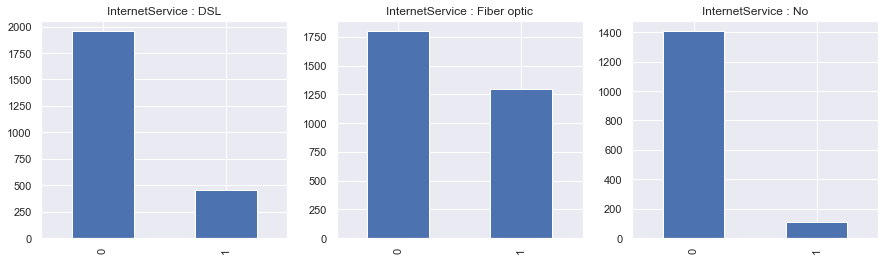

In [17]:
# for non-binary, we can set weights on it

# internetService
fig = plt.figure(figsize=(15,4))
j = 1
for i in df['InternetService'].unique():
    fig.add_subplot(1, 3, j)
    plt.title('InternetService : {}'.format(i))
    df.Churn[df['InternetService'] == i].value_counts().plot(kind='bar')
    j += 1

In [18]:
# highest to lowest churn : fiberoptic, dsl, no

# Weights
replacement = {
    'No': 0,
    'DSL': 1,
    'Fiber optic': 2
}
df['InternetService'] = df['InternetService'].apply(lambda x: replacement.get(x))

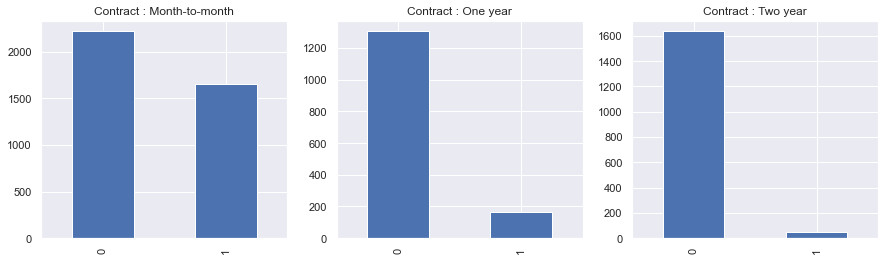

In [19]:
# contract
fig = plt.figure(figsize=(15,4))
j = 1
for i in df['Contract'].unique():
    fig.add_subplot(1, 3, j)
    plt.title('Contract : {}'.format(i))
    df.Churn[df['Contract'] == i].value_counts().plot(kind='bar')
    j += 1

In [20]:
# highest to lowest churn : M2m, 1y, 2y

# Weights
replacement = {
    'Two year': 0,
    'One year': 1,
    'Month-to-month': 2
}
df['Contract'] = df['Contract'].apply(lambda x: replacement.get(x))

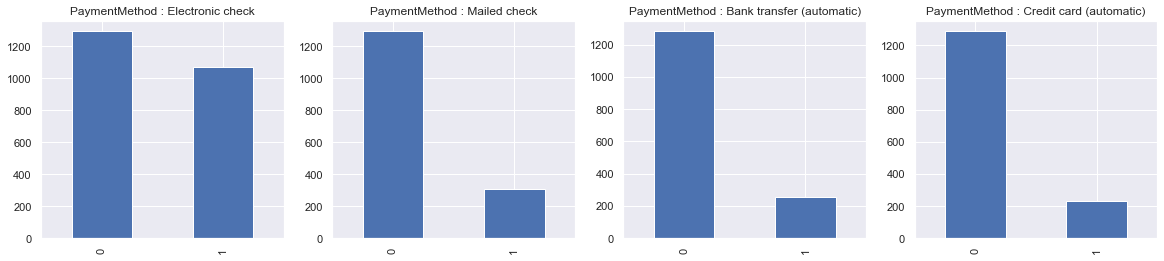

In [21]:
# payment method

fig = plt.figure(figsize=(20,4))
j = 1
for i in df['PaymentMethod'].unique():
    fig.add_subplot(1, 4, j)
    plt.title('PaymentMethod : {}'.format(i))
    df.Churn[df['PaymentMethod'] == i].value_counts().plot(kind='bar')
    j += 1

In [22]:
# highest to lowest churn : elec, main, both auto same

# Weights
replacement = {
    'Bank transfer (automatic)': 0,
    'Credit card (automatic)': 0,
    'Mailed check': 1,
    'Electronic check': 2
}
df['PaymentMethod'] = df['PaymentMethod'].apply(lambda x: replacement.get(x))

In [23]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4890,3162-ZJZFU,Male,0,1,1,53,1,0,2,0,...,0,1,1,0,2,1,2,92.55,4779.45,0
1260,9992-UJOEL,Male,0,0,0,2,1,0,1,0,...,0,0,0,0,2,1,1,50.30,92.75,0
6462,8413-VONUO,Male,0,0,0,2,1,0,2,0,...,0,0,1,1,2,0,2,95.65,167.30,1


## Model

- Decision tree

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [25]:
# assign features
X = df.drop(['Churn', 'customerID', 'gender'], axis = 1)

# assign target variable
y = df['Churn']

In [26]:


# train & test dataset split, using package, method1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)


# scale data using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# create scaler model using train data (same idea as train model first before to scale the data)
scaler.fit(X_train)

# scale the features using the trained scaler (from "scaler.fit(X_train)")
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# call the model you want to use, this case is decisionTree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)

# run the model with test dataset
y_pred = model.predict(X_test)

# get the model accuracy on test dataset
acc_score = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on TEST data is {(acc_score * 100):.2f}")

Model Accuracy on TEST data is 79.76


## iNterpret

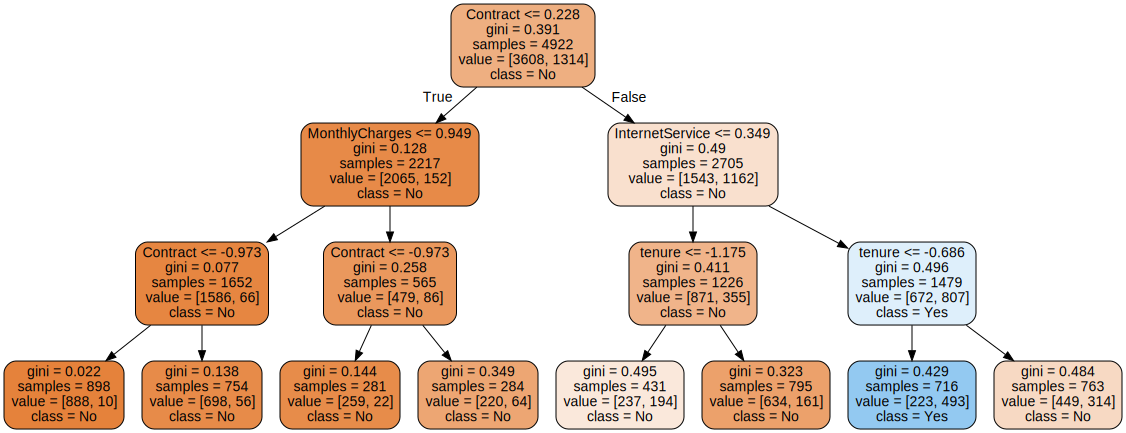

In [27]:
import graphviz

columns = list(X.columns)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [33]:
# lets try predict something with our new model

# create empty array as input of our new fresh candidate
df_predict = X.iloc[0:0].copy()

# append new candidate info into the array
df_predict = df_predict.append({
    'SeniorCitizen' : 0, 
    'Partner' : 1,
    'Dependents' : 0,
    'tenure' : 0,
    'PhoneService' : 0,
    'MultipleLines' : 0,
    'InternetService' : 0,
    'OnlineSecurity' : 0,
    'OnlineBackup' : 0,
    'DeviceProtection' : 2,
    'TechSupport' : 1,
    'StreamingTV' : 0,
    'StreamingMovies' : 0,
    'Contract' : 1,
    'PaperlessBilling' : 0,
    'PaymentMethod' : 1,
    'MonthlyCharges' : 0,
    'TotalCharges' : 99999
}, ignore_index = True
)

# predict the outcone with given new candidate
model.predict(df_predict)


# 0 means stayed, 1 means churn

array([0])